In [388]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import sklearn
from numpy import mean
from numpy import std
from numpy import sqrt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Data Exploration

In [389]:
df=pd.read_csv('../data/ps2_public.csv')
df.head()

,treatment,age,blood_pressure,gender,blood_test,family_history,TestA,TestB,GeneC,GeneD,GeneE,GeneF
0,0,64,103.820809,non-female,negative,False,4.334376,0.324374,not active,1,1,0
1,0,52,107.071369,female,negative,False,0.361847,-0.213014,active,1,0,0
2,1,55,113.116130,female,positive,False,3.611842,-0.071740,not active,0,0,1
3,0,45,83.760932,female,negative,NaN,-5.282537,-0.237121,active,0,0,0
4,0,58,131.135933,female,negative,False,2.787207,0.195470,not active,0,1,1


In [390]:
df.shape

(7500, 12)

In [391]:
df.isna().sum()

treatment            0
age                  0
blood_pressure       0
gender               0
blood_test           0
family_history    2607
TestA                0
TestB                0
GeneC                0
GeneD                0
GeneE                0
GeneF                0
dtype: int64

/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age'>

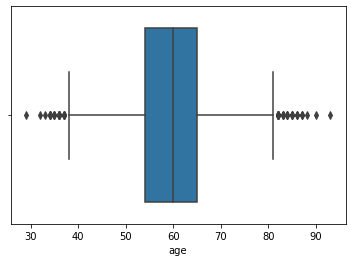

In [392]:
sns.boxplot(df['age'])

/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='blood_pressure'>

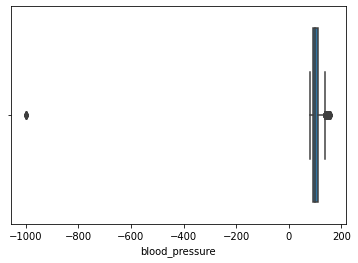

In [393]:
sns.boxplot(df['blood_pressure'])

In [394]:
print(df[df['blood_pressure']<0].head())

      treatment  age  blood_pressure  gender blood_test family_history  \
379           1   52          -999.0  female   negative          False   
1539          1   59          -999.0  female   negative          False   
1685          1   65          -999.0  female   negative          False   
2123          1   51          -999.0  female   negative            NaN   
5773          1   68          -999.0  female   negative          False   

         TestA     TestB       GeneC  GeneD  GeneE  GeneF  
379  -0.367084 -0.125044      active      1      0      0  
1539  4.776677 -0.088575  not active      0      0      1  
1685  4.026843 -0.122242      active      0      0      1  
2123  0.677114  0.047250      active      1      1      1  
5773  8.524262 -0.244947  not active      1      0      1  


Removing blood pressures below 0

In [395]:
df=df[df['blood_pressure']>0]

/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='blood_pressure'>

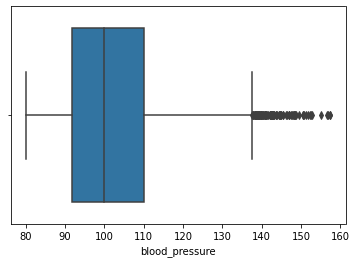

In [396]:
sns.boxplot(df['blood_pressure'])

/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='TestA'>

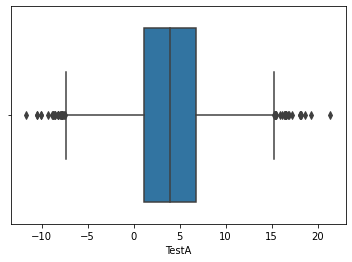

In [397]:
sns.boxplot(df['TestA'])

/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='TestB'>

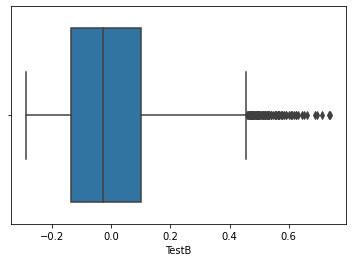

In [398]:
sns.boxplot(df['TestB'])

(array([3355.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4138.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

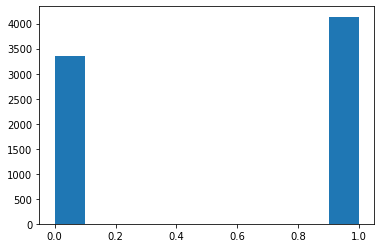

In [399]:
plt.hist(df['treatment'])

In [400]:
df['treatment'].mean()

0.5522487655144802

(array([2843.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4650.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

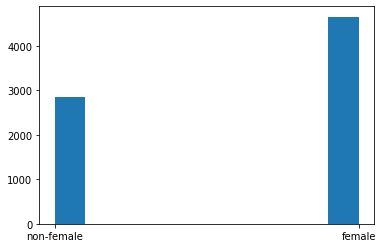

In [401]:
plt.hist(df['gender'])

(array([6857.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         636.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

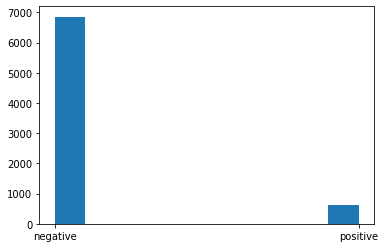

In [402]:
plt.hist(df['blood_test'])

In [403]:
df.fillna('na',inplace=True)
df=df.astype({'family_history':'str'})
df.dtypes

treatment           int64
age                 int64
blood_pressure    float64
gender             object
blood_test         object
family_history     object
TestA             float64
TestB             float64
GeneC              object
GeneD               int64
GeneE               int64
GeneF               int64
dtype: object

(array([4818.,    0.,    0.,    0.,    0., 2606.,    0.,    0.,    0.,
          69.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

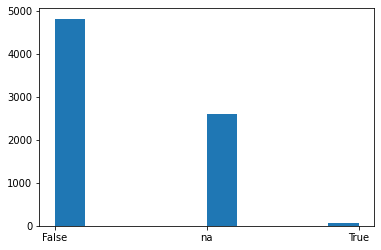

In [404]:
plt.hist(df['family_history'])

Hypothesizing the family history might have some value, as almost all true values result in treatment

In [405]:
family_history=df[df['family_history']=='True']
family_history.head()
family_history['treatment'].mean()


0.927536231884058

(array([4123.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3370.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

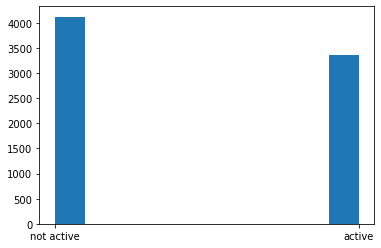

In [406]:
plt.hist(df['GeneC'])

(array([3376.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4117.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

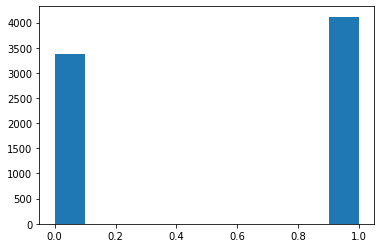

In [407]:
plt.hist(df['GeneD'])

(array([3366.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4127.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

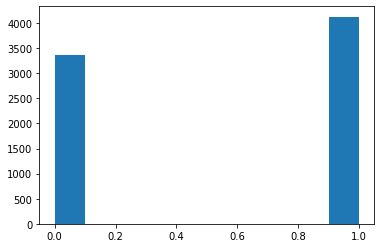

In [408]:
plt.hist(df['GeneE'])

(array([3364.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4129.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

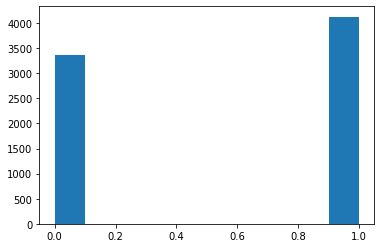

In [409]:
plt.hist(df['GeneF'])

Correlation heatmap, hypothesizing TestA won't be usefus as it's basically a proxy for age. Gender and age will likely be useful

In [410]:
df=pd.get_dummies(df,columns=['gender','blood_test','family_history','GeneC','GeneD','GeneE','GeneF'],drop_first=True)
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

,treatment,age,blood_pressure,TestA,TestB,gender_non-female,blood_test_positive,family_history_True,family_history_na,GeneC_not active,GeneD_1,GeneE_1,GeneF_1
treatment,1.000000,-0.192960,0.112425,-0.186104,-0.085017,-0.456880,-0.028148,0.072759,0.002727,-0.008590,-0.005722,-0.043775,-0.021710
age,-0.192960,1.000000,0.005739,0.969797,-0.008169,-0.007686,-0.013880,-0.031683,-0.013386,0.006400,0.001991,0.015579,-0.014001
blood_pressure,0.112425,0.005739,1.000000,0.004836,0.004828,-0.000064,0.009428,0.014884,0.004478,-0.004221,0.008336,-0.003862,-0.004008
TestA,-0.186104,0.969797,0.004836,1.000000,-0.005530,-0.009183,-0.013504,-0.029766,-0.014739,0.004536,0.004796,0.016568,-0.014733
TestB,-0.085017,-0.008169,0.004828,-0.005530,1.000000,0.003351,0.032968,-0.003332,0.006196,0.014182,0.001903,-0.009824,0.002601
gender_non-female,-0.456880,-0.007686,-0.000064,-0.009183,0.003351,1.000000,-0.009189,0.013878,0.002442,0.009204,-0.013308,-0.008775,-0.006430
blood_test_positive,-0.028148,-0.013880,0.009428,-0.013504,0.032968,-0.009189,1.000000,0.000719,-0.007234,-0.024986,-0.016792,0.008379,-0.005263
family_history_True,0.072759,-0.031683,0.014884,-0.029766,-0.003332,0.013878,0.000719,1.000000,-0.070400,-0.019568,-0.005369,-0.008438,0.022410
family_history_na,0.002727,-0.013386,0.004478,-0.014739,0.006196,0.002442,-0.007234,-0.070400,1.000000,-0.017993,0.015850,0.007135,-0.007341
GeneC_not active,-0.008590,0.006400,-0.004221,0.004536,0.014182,0.009204,-0.024986,-0.019568,-0.017993,1.000000,-0.008285,0.001149,-0.009153


# Creating functions for model fitting

In [411]:
def remove_features(*removals):
    features=['age','blood_pressure','TestA','TestB','gender_non-female','blood_test_positive','family_history_True','family_history_na','GeneC_not active','GeneD_1','GeneE_1','GeneF_1']
    for i in removals:
        features.remove(i)
    return features

In [412]:
def add_features(*additions):
    features=['age','blood_pressure','gender_non-female','blood_test_positive','family_history_True','family_history_na']
    for i in additions:
        features=features+[i]
    return features

In [413]:
def split(df,features):
    x=df[features]
    y=df['treatment']
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=1234)
    return x_train,x_test,y_train,y_test


In [414]:
def fit_model(x_train,y_train,x_test,y_test):
    model=LogisticRegression(random_state=1234,max_iter=1000)
    model.fit(x_train,y_train)
    preds=model.predict(x_test)
    print('Accuracy score is', metrics.accuracy_score(preds,y_test))
    print('F1 score is', metrics.f1_score(preds,y_test))
    print('AUC score is', metrics.roc_auc_score(preds,y_test))
    return model

In [415]:
def get_importance(features,model):
    importance = model.coef_[0]
    for i in range(len(importance)):
        print('Feature',features[i],': Coefficient:',importance[i])
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    ax.bar([x for x in range(len(importance))], importance)
    ax.set_xticks(np.arange(len(features)))
    ax.set_xticklabels(features,rotation=45)
    plt.xlabel('Feature')
    plt.ylabel('Coefficient')
    plt.title('Feature Coefficients')
    plt.show()


# Determining the usefulness of features

In [416]:
print('The baseline ie all features')
features=remove_features()
x_train,x_test,y_train,y_test=split(df,features)
model=fit_model(x_train,y_train,x_test,y_test)
test_features=['TestA','TestB','GeneC_not active','GeneD_1','GeneE_1','GeneF_1']
for i in test_features:
    print('The removed feature is', i)
    features=remove_features(i)
    x_train,x_test,y_train,y_test=split(df,features)
    model=fit_model(x_train,y_train,x_test,y_test)


The baseline ie all features
Accuracy score is 0.7444963308872582
F1 score is 0.7743076016499706
AUC score is 0.7457458186579137
The removed feature is TestA
Accuracy score is 0.7431621080720481
F1 score is 0.7733961153619776
AUC score is 0.7445092371079214
The removed feature is TestB
Accuracy score is 0.733822548365577
F1 score is 0.76707530647986
AUC score is 0.7358790483099876
The removed feature is GeneC_not active
Accuracy score is 0.7431621080720481
F1 score is 0.7731290512669416
AUC score is 0.7443637168304782
The removed feature is GeneD_1
Accuracy score is 0.7444963308872582
F1 score is 0.7743076016499706
AUC score is 0.7457458186579137
The removed feature is GeneE_1
Accuracy score is 0.7351567711807871
F1 score is 0.7671554252199414
AUC score is 0.7366415182390915
The removed feature is GeneF_1
Accuracy score is 0.742494996664443
F1 score is 0.7734741784037559
AUC score is 0.7441966136579009


In [417]:
print('The baseline ie none of the test features')
features=add_features()
x_train,x_test,y_train,y_test=split(df,features)
model=fit_model(x_train,y_train,x_test,y_test)
for i in test_features:
    print('The added feature is', i)
    features=add_features(i)
    x_train,x_test,y_train,y_test=split(df,features)
    model=fit_model(x_train,y_train,x_test,y_test)

The baseline ie none of the test features
Accuracy score is 0.7278185456971314
F1 score is 0.7616822429906542
AUC score is 0.7295270320517588
The added feature is TestA
Accuracy score is 0.7278185456971314
F1 score is 0.7616822429906542
AUC score is 0.7295270320517588
The added feature is TestB
Accuracy score is 0.733822548365577
F1 score is 0.7665301345816268
AUC score is 0.7355585952434864
The added feature is GeneC_not active
Accuracy score is 0.7304869913275517
F1 score is 0.7645687645687645
AUC score is 0.7326378794993924
The added feature is GeneD_1
Accuracy score is 0.7278185456971314
F1 score is 0.7616822429906542
AUC score is 0.7295270320517588
The added feature is GeneE_1
Accuracy score is 0.7298198799199467
F1 score is 0.7641234711706465
AUC score is 0.7320225242863271
The added feature is GeneF_1
Accuracy score is 0.7291527685123416
F1 score is 0.7636786961583236
AUC score is 0.7314073023750444


Accuracy score is 0.7444963308872582
F1 score is 0.7743076016499706
AUC score is 0.7457458186579137
Feature age : Coefficient: -0.5353460003209692
Feature blood_pressure : Coefficient: 0.3281493070075023
Feature TestA : Coefficient: 0.0054545014808048894
Feature TestB : Coefficient: -0.2312373156934287
Feature gender_non-female : Coefficient: -1.1112608149321128
Feature blood_test_positive : Coefficient: -0.10616105666554353
Feature family_history_True : Coefficient: 0.26302144827371715
Feature family_history_na : Coefficient: 0.008104974722214622
Feature GeneC_not active : Coefficient: -0.019452021977024076
Feature GeneD_1 : Coefficient: -0.03992467226413094
Feature GeneE_1 : Coefficient: -0.10963085971657295
Feature GeneF_1 : Coefficient: -0.07768137884700341


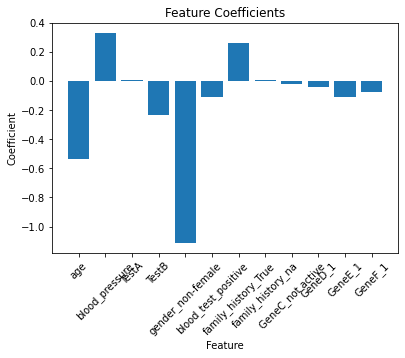

In [418]:
features=remove_features()
scaler=StandardScaler()
scaler.fit(df[features])
scaledx=scaler.transform(df[features])
x_train,x_test,y_train,y_test=train_test_split(scaledx,y,test_size=.2,random_state=1234)
model=fit_model(x_train,y_train,x_test,y_test)
get_importance(features,model)

# With features settled, finding the right model parameters

Accuracy score is 0.7411607738492328
F1 score is 0.7720329024676851
AUC score is 0.7426562759997781
Feature age : Coefficient: -0.5283603991306156
Feature blood_pressure : Coefficient: 0.3288373383852423
Feature TestB : Coefficient: -0.23284975176354608
Feature gender_non-female : Coefficient: -1.107950425250286
Feature blood_test_positive : Coefficient: -0.10417342560433797
Feature family_history_True : Coefficient: 0.26051728122417184
Feature GeneE_1 : Coefficient: -0.10722452572268917


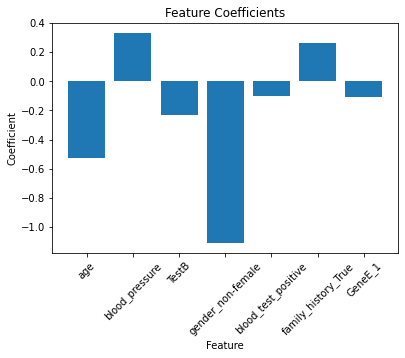

In [419]:
features=remove_features('TestA','family_history_na','GeneC_not active','GeneD_1','GeneF_1')
scaler.fit(df[features])
scaledx=scaler.transform(df[features])
x_train,x_test,y_train,y_test=train_test_split(scaledx,y,test_size=.2,random_state=1234)
model=fit_model(x_train,y_train,x_test,y_test)
get_importance(features,model)

In [420]:
features=remove_features('TestA','family_history_na','GeneC_not active','GeneD_1','GeneF_1')
scaler.fit(df[features])
scaledx=scaler.transform(df[features])
x_train,x_test,y_train,y_test=train_test_split(scaledx,y,test_size=.2,random_state=1234)
cv = KFold(n_splits=5, random_state=1234, shuffle=True)

In [421]:
grid={'penalty':['l1','l2','elasticnet'],
     'C':[.1,.5,1,5,10],
     'solver':['newton-cg','lbgfs','liblinear','sag','saga'],
     'max_iter':[100,500,1000]}

In [422]:
model=LogisticRegression(random_state=1234)
model_search=GridSearchCV(model, grid, scoring='roc_auc', cv=cv)

Safe to ignore errors of model not converging or penalty types not being supported

In [423]:
model_results=model_search.fit(x_train,y_train)

/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn

/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 435, in _check_solver
    " %s." % (all_solvers, solver))
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lbgfs.

  FitFailedWarning)
/Users/maxlee/dsci552/virtual_env/lib/pyt

/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 435, in _check_solver
    " %s." % (all_solvers, solver))
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lbgfs.

  FitFailedWarning)
/Users/maxlee/dsci552/virtual_env/lib/pyt

/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 435, in _check_solver
    " %s." % (all_solvers, solver))
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lbgfs.

  FitFailedWarning)
/Users/maxlee/dsci552/virtual_env/lib/pyt

/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 435, in _check_solver
    " %s." % (all_solvers, solver))
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lbgfs.

  FitFailedWarning)
/Users/maxlee/dsci552/virtual_env/lib/pyt

/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 435, in _check_solver
    " %s." % (all_solvers, solver))
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lbgfs.

  FitFailedWarning)
/Users/maxlee/dsci552/virtual_env/lib/pyt

/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 435, in _check_solver
    " %s." % (all_solvers, solver))
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lbgfs.

  FitFailedWarning)
/Users/maxlee/dsci552/virtual_env/lib/pyt

/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 435, in _check_solver
    " %s." % (all_solvers, solver))
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lbgfs.

  FitFailedWarning)
/Users/maxlee/dsci552/virtual_env/lib/pyt

/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 435, in _check_solver
    " %s." % (all_solvers, solver))
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lbgfs.

  FitFailedWarning)
/Users/maxlee/dsci552/virtual_env/lib/pyt

/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 435, in _check_solver
    " %s." % (all_solvers, solver))
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lbgfs.

  FitFailedWarning)
/Users/maxlee/dsci552/virtual_env/lib/pyt

/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 435, in _check_solver
    " %s." % (all_solvers, solver))
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lbgfs.

  FitFailedWarning)
/Users/maxlee/dsci552/virtual_env/lib/pyt

/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 435, in _check_solver
    " %s." % (all_solvers, solver))
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lbgfs.

  FitFailedWarning)
/Users/maxlee/dsci552/virtual_env/lib/pyt

/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 435, in _check_solver
    " %s." % (all_solvers, solver))
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lbgfs.

  FitFailedWarning)
/Users/maxlee/dsci552/virtual_env/lib/pyt

/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 435, in _check_solver
    " %s." % (all_solvers, solver))
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lbgfs.

  FitFailedWarning)
/Users/maxlee/dsci552/virtual_env/lib/pyt

/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 435, in _check_solver
    " %s." % (all_solvers, solver))
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lbgfs.

  FitFailedWarning)
/Users/maxlee/dsci552/virtual_env/lib/pyt

/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 435, in _check_solver
    " %s." % (all_solvers, solver))
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lbgfs.

  FitFailedWarning)
/Users/maxlee/dsci552/virtual_env/lib/pyt

In [424]:
model_results.best_params_

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}

In [425]:
best_model=LogisticRegression(C=.1,max_iter=100,penalty='l2',solver='saga')

Verifying there is little cost to scaling features

In [426]:
features=remove_features('TestA','family_history_na','GeneC_not active','GeneD_1','GeneF_1')
x_train,x_test,y_train,y_test=split(df,features)
best_model.fit(x_train,y_train)
preds=best_model.predict(x_test)
print('Accuracy score is', metrics.accuracy_score(preds,y_test))
print('F1 score is', metrics.f1_score(preds,y_test))
print('AUC score is', metrics.roc_auc_score(preds,y_test))

Accuracy score is 0.7358238825883923
F1 score is 0.7710982658959536
AUC score is 0.7395299571047794


/Users/maxlee/dsci552/virtual_env/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy score is 0.7418278852568378
F1 score is 0.7730205278592376
AUC score is 0.735582847358542
Feature age : Coefficient: -0.5208257803554535
Feature blood_pressure : Coefficient: 0.32420514801455935
Feature TestB : Coefficient: -0.22948919856942476
Feature gender_non-female : Coefficient: -1.0957742987998573
Feature blood_test_positive : Coefficient: -0.10262165324945816
Feature family_history_True : Coefficient: 0.2543367155833605
Feature GeneE_1 : Coefficient: -0.10588123276083172


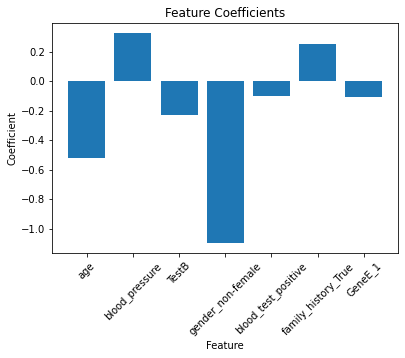

In [427]:
features=remove_features('TestA','family_history_na','GeneC_not active','GeneD_1','GeneF_1')
scaler.fit(df[features])
scaledx=scaler.transform(df[features])
x_train,x_test,y_train,y_test=train_test_split(scaledx,y,test_size=.2,random_state=1234)
best_model.fit(x_train,y_train)
preds=best_model.predict(x_test)
print('Accuracy score is', metrics.accuracy_score(y_test,preds))
print('F1 score is', metrics.f1_score(y_test,preds))
print('AUC score is', metrics.roc_auc_score(y_test,preds))
get_importance(features,best_model)

# Understanding model performance

In [428]:
print(metrics.classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.75      0.66      0.70       691
           1       0.73      0.82      0.77       808

    accuracy                           0.74      1499
   macro avg       0.74      0.74      0.74      1499
weighted avg       0.74      0.74      0.74      1499



In [429]:
cm=metrics.confusion_matrix(y_test,preds)
print(cm)

[[453 238]
 [149 659]]


In [430]:
print('True negatives:',cm[0][0])
print('False negatives:',cm[1][0])
print('False positives:',cm[0][1])
print('True positives:',cm[1][1])
print('Total observations:', len(y_test))

True negatives: 453
False negatives: 149
False positives: 238
True positives: 659
Total observations: 1499
